# 🧾 Customer Segmentation Dataset (Synthetic)

This dataset simulates customer profiles based on **Annual Income** and **Spending Score**, designed for use in clustering and segmentation exercises.

---

## 📊 Feature Description

| Feature         | Description                                              |
|-----------------|----------------------------------------------------------|
| `Annual_Income` | Customer income in arbitrary units (e.g., $1,000s)       |
| `Spending_Score`| Score representing customer spending behavior (0–100)    |

---

## 🧪 How the Data Was Generated

Using `numpy.random.normal`, we created **3 distinct customer groups** to reflect real-world behavioral segments:

| Group | Annual Income (Mean ± Std) | Spending Score (Mean ± Std) | Description                         |
|-------|-----------------------------|-------------------------------|-------------------------------------|
| 1     | 25 ± 3                      | 80 ± 5                        | 🎯 Young professionals, high spenders |
| 2     | 70 ± 5                      | 30 ± 10                       | 💼 Affluent, cautious spenders       |
| 3     | 45 ± 7                      | 50 ± 5                        | 👨‍💼 Mid-career, moderate spenders     |

The dataset contains **300 samples**, equally split between the three groups.

---

## 💾 File Info

The dataset was saved to a CSV file for later use:

```python
df.to_csv("spending.csv", index=False)


<h1 style='color:blue'>Import Libraries</h1>

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

<h1 style='color:blue'>Dataset Laoding</h1>

In [3]:
df = pd.read_csv("spending.csv")
df.head()

,Annual_Income,Spending_Score
0,26.490142,75.855025
1,24.585207,77.199095
2,26.943066,83.736468
3,29.569090,83.051851
4,24.297540,79.895492


<h1 style='color:blue'>Original Data Plotting to the Scatter Plot</h1>

Text(0, 0.5, 'Spending_Score')

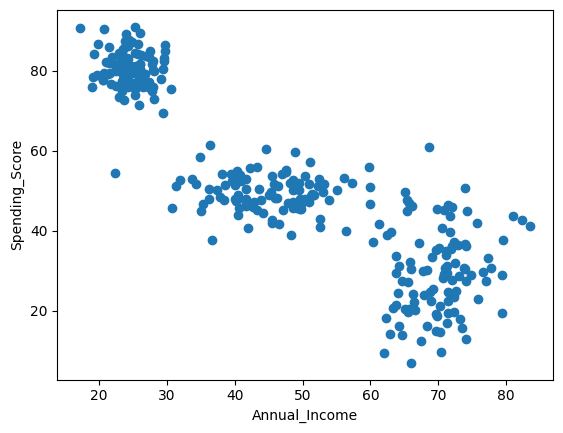

In [4]:
plt.scatter(df.Annual_Income,df['Spending_Score'])
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')

<h1 style='color:blue'>Use Elbow Method to select a suitable K value</h1>

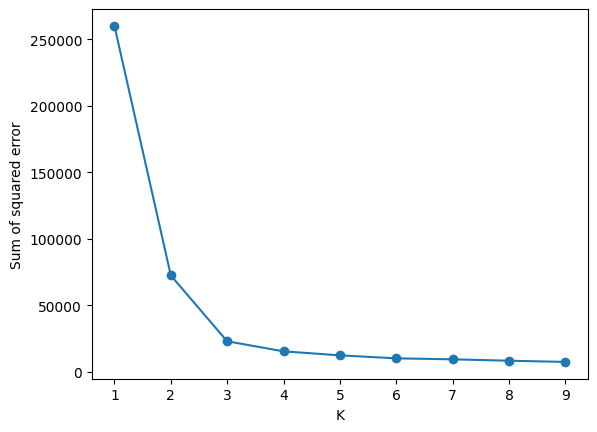

In [5]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual_Income', 'Spending_Score']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse, marker='o')  # Added marker 'o'
plt.show()


<h1 style='color:blue'>Clusters interpretation</h1>

In [6]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Annual_Income','Spending_Score']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

<h1 style='color:blue'>Cluster Prediction</h1>

In [7]:
df['cluster']=y_predicted
print(df.head())

   Annual_Income  Spending_Score  cluster
0      26.490142       75.855025        1
1      24.585207       77.199095        1
2      26.943066       83.736468        1
3      29.569090       83.051851        1
4      24.297540       79.895492        1


<h1 style='color:blue'>Cluster Centroids</h1>

In [8]:
km.cluster_centers_

array([[70.10520716, 29.21057693],
       [24.68846045, 80.5342006 ],
       [45.46058954, 49.65285037]])

<h1 style='color:blue'>Plot data points into their specific clusters after selecting a correct K value using Elbow Method</h1>

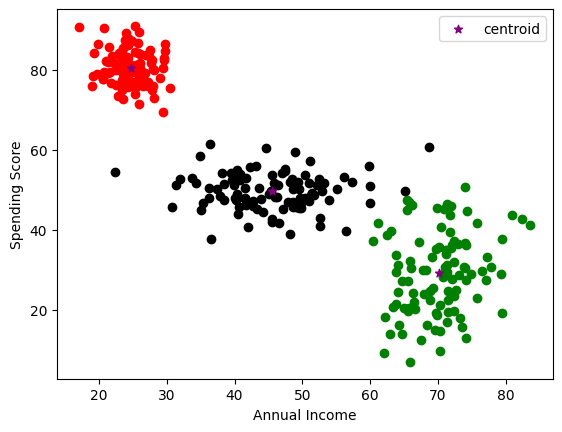

In [9]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Annual_Income,df1['Spending_Score'],color='green')
plt.scatter(df2.Annual_Income,df2['Spending_Score'],color='red')
plt.scatter(df3.Annual_Income,df3['Spending_Score'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

<h1 style='color:blue'>Cluster interpretation</h1>

In [10]:
# 6. Interpret clusters
df['Cluster'] = y_predicted
cluster_profiles = df.groupby('Cluster').mean().iloc[:, :-1]  # drop last column
print("\nCluster Profiles:")
print(cluster_profiles)



Cluster Profiles:
         Annual_Income  Spending_Score
Cluster                               
0            70.105207       29.210577
1            24.688460       80.534201
2            45.460590       49.652850
